In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bankdata = pd.read_csv("/Users/sofielysenko/PCA_Out1.csv") # Reading the data in with pandas


In [2]:
bankdata.shape # rows, columns

(1744, 5)

In [3]:
bankdata.head() # see what data actually looks like

,Unnamed: 0,principal component 1,principal component 2,principal component 3,target
0,0,0.057671,-1.006758,0.714448,Positive
1,1,0.175376,-0.835227,0.749607,Positive
2,2,-0.577152,-2.005430,1.697439,Positive
3,3,-0.145944,-1.830613,1.851696,Positive
4,4,0.284144,-1.562481,1.914279,Positive


In [28]:
#Convert to a pickle file 
bankdata.to_pickle('normalized_all_keypoints.pickle')

In [5]:
#Data Preprocessing
#(1) Divide the data into attributes and labels
#(2) Divide the data into training and testing sets

In [4]:
X = bankdata.drop('target', axis=1) # removing the Class column bc that is labels
y = bankdata['target'] # only Class column

In [5]:
print(y)

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
5       Positive
6       Positive
7       Positive
8       Positive
9       Positive
10      Positive
11      Positive
12      Positive
13      Positive
14      Positive
15      Positive
16      Positive
17      Positive
18      Positive
19      Positive
20      Positive
21      Positive
22      Positive
23      Positive
24      Positive
25      Positive
26      Positive
27      Positive
28      Positive
29      Positive
          ...   
1714     Neutral
1715     Neutral
1716     Neutral
1717     Neutral
1718     Neutral
1719     Neutral
1720     Neutral
1721     Neutral
1722     Neutral
1723     Neutral
1724     Neutral
1725     Neutral
1726     Neutral
1727     Neutral
1728     Neutral
1729     Neutral
1730     Neutral
1731     Neutral
1732     Neutral
1733     Neutral
1734     Neutral
1735     Neutral
1736     Neutral
1737     Neutral
1738     Neutral
1739     Neutral
1740     Neutral
1741     Neutr

In [6]:
from sklearn.model_selection import train_test_split  # split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [7]:
y_train

1500     Neutral
404     Positive
421     Positive
257     Positive
1699     Neutral
1643     Neutral
1339    Negative
741     Negative
206     Positive
713     Negative
1494     Neutral
1365     Neutral
536     Positive
1429     Neutral
1551     Neutral
386     Positive
1454     Neutral
733     Negative
479     Positive
385     Positive
911     Negative
620     Positive
121     Positive
663     Positive
1740     Neutral
566     Positive
228     Positive
1689     Neutral
180     Positive
272     Positive
          ...   
1140    Negative
624     Positive
184     Positive
1530     Neutral
325     Positive
701     Negative
951     Negative
841     Negative
1590     Neutral
1279    Negative
834     Negative
858     Negative
1727     Neutral
407     Positive
1582     Neutral
756     Negative
541     Positive
912     Negative
349     Positive
694     Negative
243     Positive
866     Negative
634     Positive
1233    Negative
1307    Negative
1546     Neutral
1212    Negative
1597     Neutr

In [8]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
                                                    y, test_size=0.33)

ImportError: cannot import name 'cross_validation' from 'sklearn' (/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)

In [15]:
from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=146, n_repeats=50, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145] Validation: [126]


KeyError: '[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144\n 145] not in index'

In [9]:
#Training the Algo

from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
# Making Predictions
y_pred = svclassifier.predict(X_test)  

In [11]:
#Evaluating the Algo
#Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[124   1   0]
 [  0  78   0]
 [  0   0 146]]
              precision    recall  f1-score   support

    Negative       1.00      0.99      1.00       125
     Neutral       0.99      1.00      0.99        78
    Positive       1.00      1.00      1.00       146

   micro avg       1.00      1.00      1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



In [105]:
#Implementing Kernel SVM with Scikit-Learn

In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bankdata = pd.read_csv("/Users/sofielysenko/PCA_Out1.csv") # Reading the data in with pandas

In [33]:
X = bankdata.drop('target', axis=1) # removing the Class column bc that is labels
y = bankdata['target'] # only Class column

In [34]:
#Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [36]:
#1. Polynomial Kernel

from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=10)  
svclassifier.fit(X_train, y_train)  

#Making predictions
y_pred = svclassifier.predict(X_test)  

#Evaluate 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[  0   0 125]
 [  0   0  83]
 [  0   0 141]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       125
     Neutral       0.00      0.00      0.00        83
    Positive       0.40      1.00      0.58       141

   micro avg       0.40      0.40      0.40       349
   macro avg       0.13      0.33      0.19       349
weighted avg       0.16      0.40      0.23       349



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#2. Gaussian Kernel
#(different setup)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

#Prediction (same)
y_pred = svclassifier.predict(X_test)  

#Evaluate (same)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[125   0   0]
 [  4  79   0]
 [  0   0 141]]
              precision    recall  f1-score   support

    Negative       0.97      1.00      0.98       125
     Neutral       1.00      0.95      0.98        83
    Positive       1.00      1.00      1.00       141

   micro avg       0.99      0.99      0.99       349
   macro avg       0.99      0.98      0.99       349
weighted avg       0.99      0.99      0.99       349



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
#3. Sigmoid Kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 98   0  27]
 [ 69   0  14]
 [119   0  22]]
              precision    recall  f1-score   support

    Negative       0.34      0.78      0.48       125
     Neutral       0.00      0.00      0.00        83
    Positive       0.35      0.16      0.22       141

   micro avg       0.34      0.34      0.34       349
   macro avg       0.23      0.31      0.23       349
weighted avg       0.26      0.34      0.26       349



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes

# Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

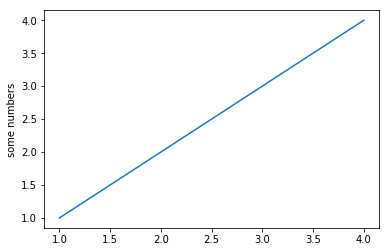

In [111]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], [1,2,3,4])
plt.ylabel('some numbers')
plt.show()

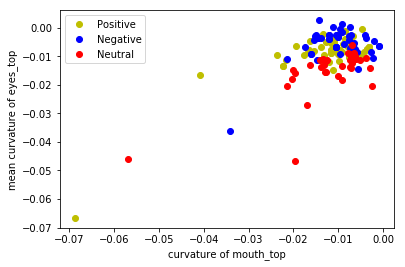

In [140]:
import matplotlib.pyplot as plt  #plotting cross validation and emotion paramaters



#mean curvature of eyes_top v. curvature of mouth_top

plt.plot([-0.00806411,
-0.01589476,
-0.01160663,
-0.01025176,
-0.00311819,
-0.00311819,
-0.01160663,
-0.01025176,
-0.00311819,
-0.01342401,
-0.00908403,
-0.01770433,
-0.00675553,
-0.00494765,
-0.00463582,
-0.0084853,
-0.01111215,
-0.01383382,
-0.01378833,
-0.00742621,
-0.01065938,
-0.01170681,
-0.01170681,
-0.00968592,
-0.00479239,
-0.01053609,
-0.01676623,
-0.00649448,
-0.04080943,
-0.01543992,
-0.00734975,
-0.0101308,
-0.01101356,
-0.01205509,
-0.01656136,
-0.01324697,
-0.00848422,
-0.01089667,
-0.0067849,
-0.01067126,
-0.02367693,
-0.00886555,
-0.0215474,
-0.02224071,
-0.02224071,
-0.0042364,
-0.00368749,
-0.00368749,
-0.01282005,
-0.01327951,
-0.0110624,
-0.0117359,
-0.00724189,
-0.01134828,
-0.01935585,
-0.00958579,
-0.00985592,
-0.01638157,
-0.00764207,
-0.00764207,
-0.06870794], [-0.006518755,
-0.008877615,
-0.00761043,
-0.00824203,
-0.00674816,
-0.00674816,
-0.00761043,
-0.00824203,
-0.00674816,
-0.001993585,
-0.00858066,
-0.009377765,
-0.00280986,
-0.009249925,
-0.00035805,
-0.001266414772,
-0.014741315,
-0.011204745,
-0.006600885,
-0.00419438,
-0.006411365,
-0.00878944,
-0.00878944,
-0.00773097,
-0.010713985,
-0.003269275,
-0.008438265,
-0.00900733,
-0.016694445,
-0.0080187,
-0.005314275,
-0.00925217,
-0.004141405,
-0.01187232,
-0.007665355,
-0.00942107,
-0.004023245,
-0.005430415,
-0.00682665,
-0.00827142,
-0.009423155,
-0.005675285,
-0.011282435,
-0.01351077,
-0.01351077,
-0.00843225,
-0.00746669,
-0.00746669,
-0.00486183,
-0.01017229,
-0.00377968,
-0.004918515,
-0.007296505,
-0.00551844,
-0.006274305,
-0.00197358,
-0.01148569,
-0.004669195,
-0.01005287,
-0.01005287,
-0.06666667,

], "yo", label = "Positive") #Positive
plt.legend()

plt.plot([-0.00632528,
-0.01054894,
-0.01054894,
-0.01054894,
-0.01054894,
-0.01210659,
-0.01210659,
-0.00920739,
-0.00390145,
-0.01050513,
-0.0103832,
-0.01209897,
-0.01209897,
-0.0161115,
-0.0161115,
-0.00764177,
-0.01514055,
-0.00950656,
-0.01000238,
-0.01000238,
-0.00737922,
-0.00673623,
-0.00673623,
-0.01477629,
-0.00087657,
-0.00087657,
-0.01451691,
-0.01451691,
-0.00868048,
-0.00196974,
-0.00726705,
-0.02149493,
-0.00569533,
-0.00394741,
-0.03413358,
-0.01490169,
-0.00659931,
-0.00761598,
-0.01379964,
-0.00224749,
-0.00266443,
-0.01733787,
-0.00911591,
-0.0073498,
-0.01425589,
-0.01536487,
-0.01113472,
-0.00589383,
-0.00968274], [-0.007562615,
-0.00668079,
-0.00668079,
-0.00668079,
-0.00668079,
-0.00258631,
-0.00258631,
0.001263959811,
-0.003569145,
-0.002406855,
-0.00257888,
-0.00388262,
-0.00388262,
-0.00905484,
-0.00905484,
-0.004097115,
-0.00300311,
-0.009022355,
-0.00332557,
-0.00332557,
-0.006944945,
-0.00637214,
-0.00637214,
-0.011252155,
-0.00647785,
-0.00647785,
-0.00342047,
-0.00342047,
-0.005677565,
-0.004601335,
-0.00258945,
-0.01083616,
-0.0145334,
-0.002535885,
-0.03618197,
-0.002529885,
-0.00531771,
-0.0029355,
-0.00365497,
-0.01050821,
-0.008622125,
-0.00654587,
-0.001391485,
3.15E-04,
0.0026387,
-0.00437962,
0.00036859,
-0.008451715,
-0.000477675],"bo", label= 'Negative') #Negative
plt.legend()

plt.plot([-0.0090756,
-0.00735513,
-0.01974855,
-0.01347077,
-0.00998419,
-0.00389741,
-0.0195448,
-0.05693324,
-0.0066998,
-0.0126551,
-0.00720337,
-0.00720337,
-0.00658918,
-0.00924476,
-0.01398233,
-0.00524069,
-0.01619646,
-0.02141228,
-0.01269043,
-0.00617308,
-0.0128979,
-0.01256407,
-0.02038972,
-0.00615366,
-0.01318539,
-0.01689665,
-0.00289739,
-0.01394908,
-0.00711871,
-0.00727892,
-0.00251227,
-0.02010163,
-0.00775365,
-0.00735879,
-0.00699078,
-0.00703828], [-0.01346618,
-0.00909097,
-0.04674755,
-0.010857525,
-0.01695174,
-0.010727625,
-0.015819455,
-0.0459596,
-0.011195145,
-0.015553535,
-0.0098414,
-0.0098414,
-0.008742785,
-0.0182225,
-0.01125608,
-0.011157715,
-0.0131913,
-0.02028265,
-0.0117589,
-0.01003293,
-0.015322425,
-0.011171765,
-0.01797139,
-0.01074623,
-0.01311073,
-0.02705113,
-0.014152505,
-0.013876535,
-0.014175015,
-0.011316025,
-0.020318135,
-0.014774325,
-0.008984615,
-0.01370141,
-0.005908525,
-0.01240508],"ro", label= 'Neutral') #Neutral
 #Neutral
plt.legend()

plt.ylabel('mean curvature of eyes_top')
plt.xlabel('curvature of mouth_top')
plt.show()

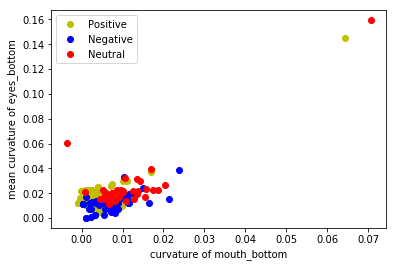

In [139]:
import matplotlib.pyplot as plt  #plotting cross validation and emotion paramaters



#mean curvature of eyes_bottom v. curvature of mouth_bottom

plt.plot([-0.00053172,
0.00179896,
-0.00082625,
0.00163851,
0.00554361,
0.00554361,
-0.00082625,
0.00163851,
0.00554361,
0.00714897,
0.00112689,
0.01096554,
0.00068501,
0.00031863,
0.00436679,
0.00316389,
0.00280791,
0.00740591,
0.00181211,
0.00425187,
0.00258992,
0.00716907,
0.00716907,
0.00239199,
0.00076099,
0.0080315,
0.00444299,
0.00029762,
0.01693755,
0.00181862,
0.0044141,
0.00235529,
0.00315402,
0.00259624,
0.00325328,
0.00160456,
0.00983083,
0.00391261,
0.00545945,
-0.00027151,
0.01007778,
0.00910477,
0.00262512,
0.00909874,
0.00909874,
0.00286524,
0.00231539,
0.00231539,
0.0071696,
0.00365748,
0.00623947,
0.00400905,
0.00403155,
0.00385098,
0.01026872,
0.00340949,
0.00214095,
0.01193692,
0.00409735,
0.00409735,
0.06443319], [0.01651621,
0.00888925,
0.01219278,
0.02247927,
0.01235369,
0.01235369,
0.01219278,
0.02247927,
0.01235369,
0.01227882,
0.01719957,
0.02955061,
0.01024655,
0.01526611,
0.02113394,
0.00753002,
0.02125608,
0.02737288,
0.01647447,
0.00825593,
0.00976881,
0.01949738,
0.01949738,
0.01990381,
0.02273756,
0.01891317,
0.01888252,
0.01418944,
0.03686995,
0.01546764,
0.00532303,
0.01916671,
0.01851596,
0.02282631,
0.02179928,
0.02100884,
0.00976369,
0.0106125,
0.01907229,
0.02216865,
0.02968961,
0.02164486,
0.02187902,
0.02102634,
0.02102634,
0.01648939,
0.02287401,
0.02287401,
0.02581778,
0.0147891,
0.01141587,
0.01653191,
0.01989948,
0.01388858,
0.01531977,
0.01025967,
0.01448538,
0.01995541,
0.02475113,
0.02475113,
0.14545455

], "yo", label = "Positive") #Positive
plt.legend()

plt.plot([0.0035199,
0.00019925,
0.00019925,
0.00019925,
0.00019925,
0.00563954,
0.00563954,
0.02133023,
0.00200668,
0.0112916,
0.00874845,
0.00094073,
0.00094073,
0.00441194,
0.00441194,
0.01159923,
0.01100213,
0.01093919,
0.01273862,
0.01273862,
0.00099057,
0.00335781,
0.00335781,
0.00684592,
0.00761256,
0.00761256,
0.00201115,
0.00201115,
0.00260739,
0.00357567,
0.00231731,
0.00238486,
0.00906441,
0.01161257,
0.02371649,
0.00883959,
0.0035829,
0.00190015,
0.00557099,
0.00878245,
0.01091829,
0.01499047,
0.00422495,
0.00562965,
0.01646773,
0.00813067,
0.00877985,
0.01025773,
0.00710254], [0.01348223,
0.01166671,
0.01166671,
0.01166671,
0.01166671,
0.011252,
0.011252,
0.0151846,
0.008199,
0.01180907,
0.00767813,
0.00010742,
0.00010742,
0.01281387,
0.01281387,
0.01184374,
0.01624843,
0.01722167,
0.02053789,
0.02053789,
0.01675299,
0.00261429,
0.00261429,
0.00985207,
0.0088177,
0.0088177,
0.01183881,
0.01183881,
0.01268062,
0.01246038,
0.00746359,
0.00058814,
0.01482486,
0.01972628,
0.03875902,
0.01256725,
0.01307099,
0.00738714,
0.0025283,
0.0131696,
0.01478015,
0.02454557,
0.01065764,
0.00769822,
0.01248309,
0.00453726,
0.00759232,
0.03311376,
0.00533788],"bo", label= 'Negative') #Negative
plt.legend()

plt.plot([0.00637062,
0.00669765,
-0.00370307,
0.00565143,
0.00807923,
0.00528394,
0.01857916,
0.07073232,
0.00445179,
0.0124948,
0.00728046,
0.00728046,
0.00737986,
0.01575797,
0.01545709,
0.00601889,
0.01376219,
0.01699376,
0.0089542,
0.01276097,
0.00595578,
0.01751791,
0.01055092,
0.01075988,
0.0134648,
0.01340894,
0.01433224,
0.00866604,
0.00084594,
0.01010863,
0.01003,
0.02045,
0.00906746,
0.00881333,
0.00521356,
0.00955752], [0.01440924,
0.01105455,
0.06085067,
0.01877255,
0.01386357,
0.01533985,
0.02228057,
0.15929973,
0.01535981,
0.02166354,
0.01796548,
0.01796548,
0.02000368,
0.02321055,
0.01704064,
0.01980853,
0.02166573,
0.0393901,
0.02082907,
0.01509436,
0.02046781,
0.02297852,
0.03226986,
0.01363604,
0.01952442,
0.03156138,
0.03001645,
0.02290594,
0.02087034,
0.02135233,
0.02161374,
0.02650036,
0.01698329,
0.01740446,
0.02232833,
0.0224823],"ro", label= 'Neutral') #Neutral
 #Neutral
plt.legend()    
plt.ylabel('mean curvature of eyes_bottom')
plt.xlabel('curvature of mouth_bottom')
plt.show()

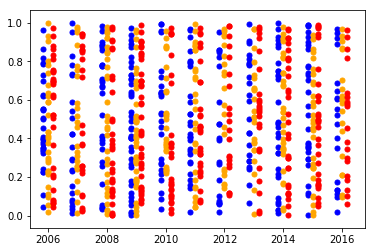

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import matplotlib.transforms as transforms

year = np.random.choice(np.arange(2006,2017), size=(300) ) 
values = np.random.rand(300, 3)

plt.figure()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

sc1 = plt.scatter(year, values[:,0], c = 'blue', s = 25, transform=trans+offset(-5))
plt.scatter(year, values[:,1], c = 'orange', s = 25)
plt.scatter(year, values[:,2], c = 'red', s = 25, transform=trans+offset(5))

plt.show()

In [ ]:

import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

 
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)